In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt



df=pd.read_csv('weather.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [2]:
print(df.isnull().sum())
df = df.fillna(df['Precip Type'].value_counts().index[0])

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [3]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Loud Cover                    int64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [4]:
#chaging the datatype of Formatted Date column 
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

In [5]:

df=df.set_index('Formatted Date')
df.head()


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [6]:
df_monthly_mean = df[['Apparent Temperature (C)', 'Humidity']].resample('M').mean()
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-31 00:00:00+00:00,-4.050000,0.890000
2006-01-31 00:00:00+00:00,-4.173708,0.834610
2006-02-28 00:00:00+00:00,-2.990716,0.843467
2006-03-31 00:00:00+00:00,1.969780,0.778737
2006-04-30 00:00:00+00:00,12.098827,0.728625


Plotting the variation in Apparent Temperature and Humidity with time

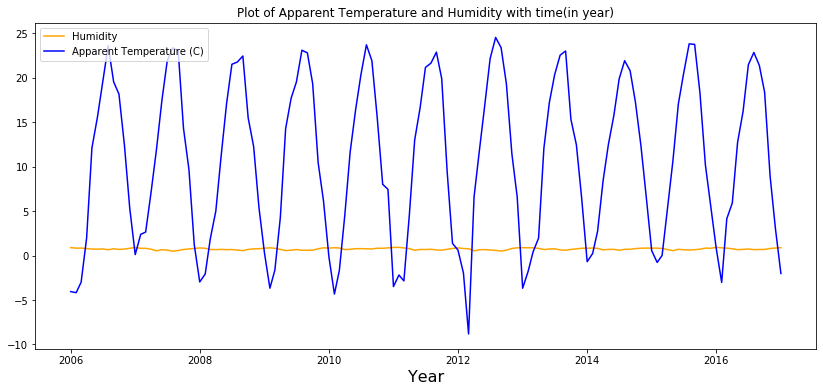

In [7]:
plt.figure(figsize=(14,6))
plt.title("Plot of Apparent Temperature and Humidity with time(in year)")
plt.plot(df_monthly_mean['Humidity'],label='Humidity',color='orange')
plt.plot(df_monthly_mean['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='blue')
plt.xlabel("Year",fontsize="16")
plt.legend(loc=2,fontsize=10)


In [8]:
jan=df_monthly_mean[df_monthly_mean.index.month==1]
feb=df_monthly_mean[df_monthly_mean.index.month==2]
mar=df_monthly_mean[df_monthly_mean.index.month==3]
apr=df_monthly_mean[df_monthly_mean.index.month==4]
may=df_monthly_mean[df_monthly_mean.index.month==5]
jun=df_monthly_mean[df_monthly_mean.index.month==6]
jul=df_monthly_mean[df_monthly_mean.index.month==7]
aug=df_monthly_mean[df_monthly_mean.index.month==8]
sep=df_monthly_mean[df_monthly_mean.index.month==9]
octo=df_monthly_mean[df_monthly_mean.index.month==10]
nov=df_monthly_mean[df_monthly_mean.index.month==11]
dec=df_monthly_mean[df_monthly_mean.index.month==12]

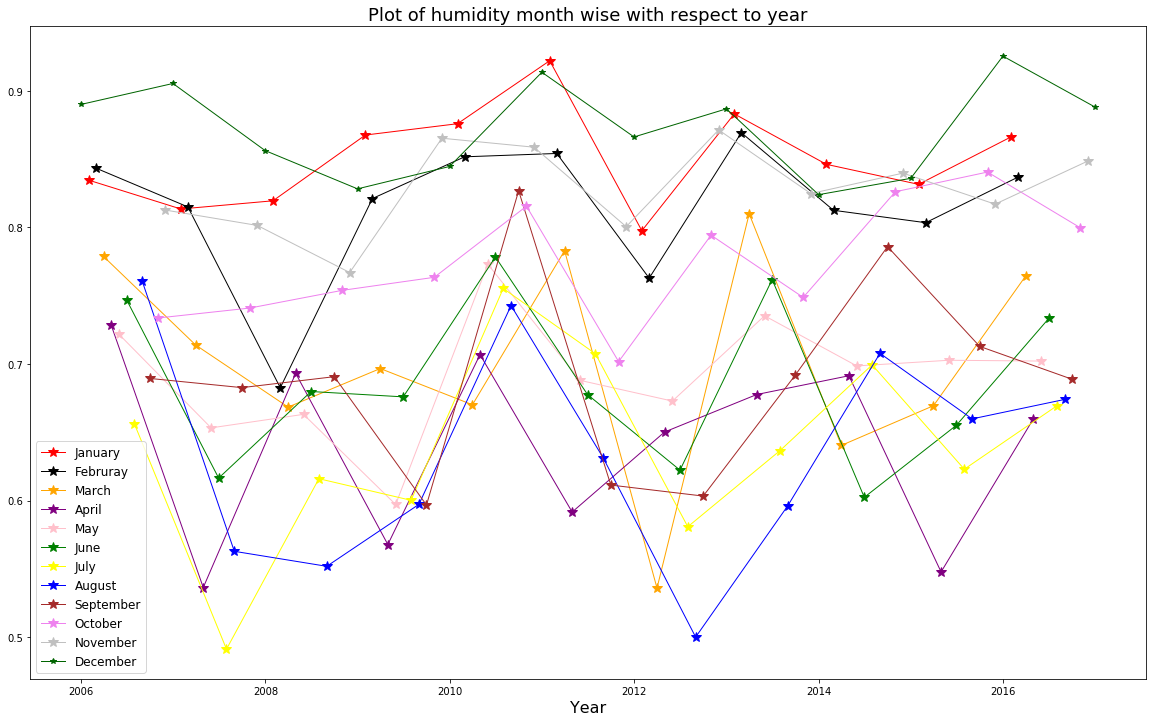

In [9]:
plt.figure(figsize=(20,12))
plt.title("Plot of humidity month wise with respect to year",fontsize=18)
plt.plot(jan['Humidity'],label='January',color="red",marker='*',linewidth=1, markersize=10)
plt.plot(feb['Humidity'],label='Februray',color="black",marker='*',linewidth=1, markersize=10)
plt.plot(mar['Humidity'],label='March',color="orange",marker='*',linewidth=1, markersize=10)
plt.plot(apr['Humidity'],label='April',color="purple",marker='*',linewidth=1, markersize=10)
plt.plot(may['Humidity'],label='May',color="pink",marker='*',linewidth=1, markersize=10)
plt.plot(jun['Humidity'],label='June',color="green",marker='*',linewidth=1, markersize=10)
plt.plot(jul['Humidity'],label='July',color="yellow",marker='*',linewidth=1, markersize=10)
plt.plot(aug['Humidity'],label='August',color="blue",marker='*',linewidth=1, markersize=10)
plt.plot(sep['Humidity'],label='September',color="brown",marker='*',linewidth=1, markersize=10)
plt.plot(octo['Humidity'],label='October',color="violet",marker='*',linewidth=1, markersize=10)
plt.plot(nov['Humidity'],label='November',color="silver",marker='*',linewidth=1, markersize=10)
plt.plot(dec['Humidity'],label='December',color="darkgreen",marker='*',linewidth=1, markersize=6)
plt.xlabel("Year",fontsize=16)
plt.legend(loc=3,fontsize=12)

Plot of Average apparent temperature for all year based on month

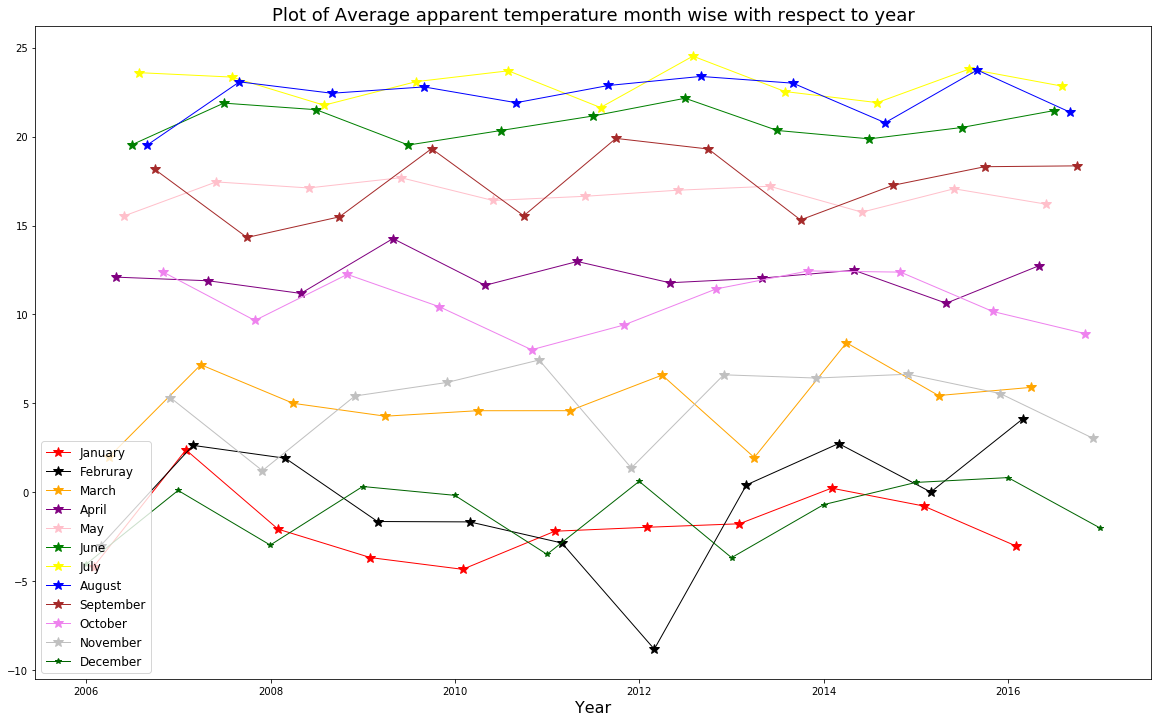

In [10]:
plt.figure(figsize=(20,12))
plt.title("Plot of Average apparent temperature month wise with respect to year",fontsize=18)
plt.plot(jan['Apparent Temperature (C)'],label='January',color="red",marker='*',linewidth=1, markersize=10)
plt.plot(feb['Apparent Temperature (C)'],label='Februray',color="black",marker='*',linewidth=1, markersize=10)
plt.plot(mar['Apparent Temperature (C)'],label='March',color="orange",marker='*',linewidth=1, markersize=10)
plt.plot(apr['Apparent Temperature (C)'],label='April',color="purple",marker='*',linewidth=1, markersize=10)
plt.plot(may['Apparent Temperature (C)'],label='May',color="pink",marker='*',linewidth=1, markersize=10)
plt.plot(jun['Apparent Temperature (C)'],label='June',color="green",marker='*',linewidth=1, markersize=10)
plt.plot(jul['Apparent Temperature (C)'],label='July',color="yellow",marker='*',linewidth=1, markersize=10)
plt.plot(aug['Apparent Temperature (C)'],label='August',color="blue",marker='*',linewidth=1, markersize=10)
plt.plot(sep['Apparent Temperature (C)'],label='September',color="brown",marker='*',linewidth=1, markersize=10)
plt.plot(octo['Apparent Temperature (C)'],label='October',color="violet",marker='*',linewidth=1, markersize=10)
plt.plot(nov['Apparent Temperature (C)'],label='November',color="silver",marker='*',linewidth=1, markersize=10)
plt.plot(dec['Apparent Temperature (C)'],label='December',color="darkgreen",marker='*',linewidth=1, markersize=6)
plt.xlabel("Year",fontsize=16)
plt.legend(loc=3,fontsize=12)

Monthly analysis has to be done for all 12 months over the 10 year period



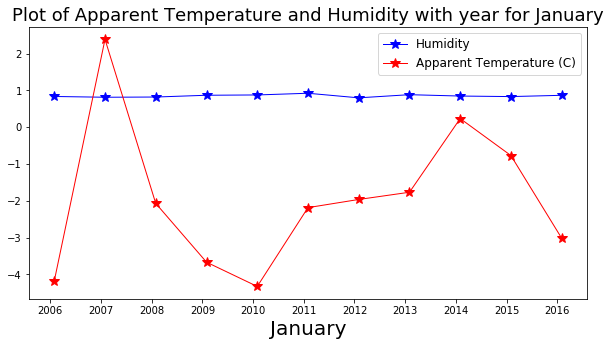

In [11]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year for January",fontsize=18)
plt.plot(jan['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1, markersize=10)
plt.plot(jan['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1, markersize=10)
plt.xlabel('January',fontsize=20)
plt.legend(loc=1,fontsize=12)

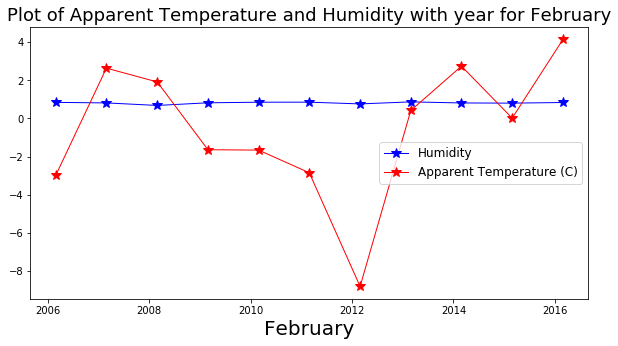

In [12]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year for February",fontsize=18)
plt.plot(feb['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1, markersize=10)
plt.plot(feb['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1, markersize=10)
plt.xlabel('February',fontsize=20)
plt.legend(loc=5,fontsize=12)

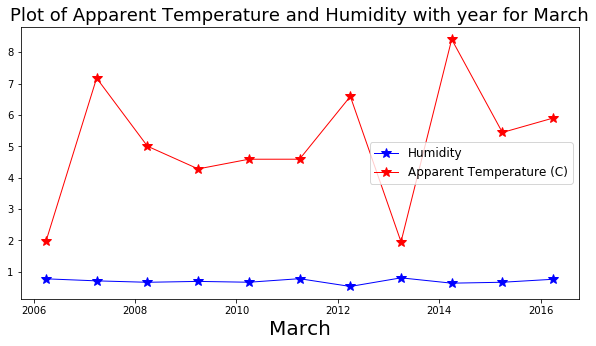

In [13]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year for March",fontsize=18)
plt.plot(mar['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1, markersize=10)
plt.plot(mar['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1, markersize=10)
plt.xlabel('March',fontsize=20)
plt.legend(loc=5,fontsize=12)

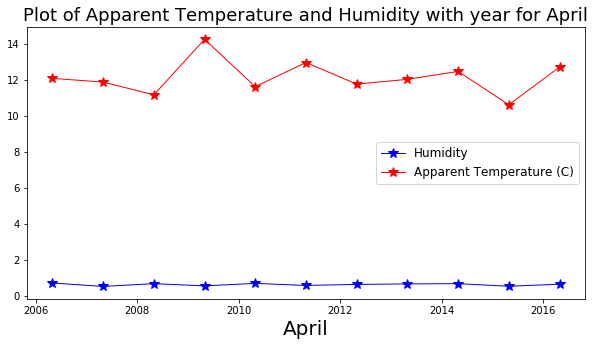

In [14]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year for April",fontsize=18)
plt.plot(apr['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1, markersize=10)
plt.plot(apr['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1, markersize=10)
plt.xlabel('April',fontsize=20)
plt.legend(loc=5,fontsize=12)

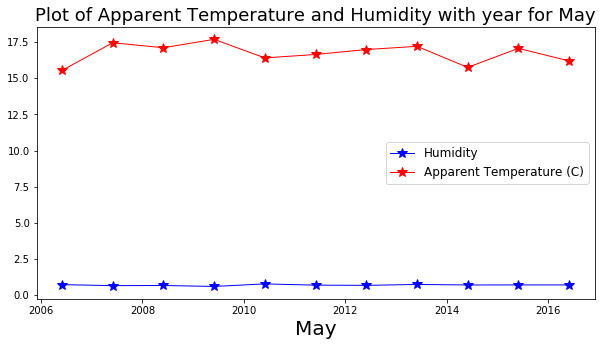

In [15]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year for May",fontsize=18)
plt.plot(may['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1, markersize=10)
plt.plot(may['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1, markersize=10)
plt.xlabel('May',fontsize=20)
plt.legend(loc=5,fontsize=12)

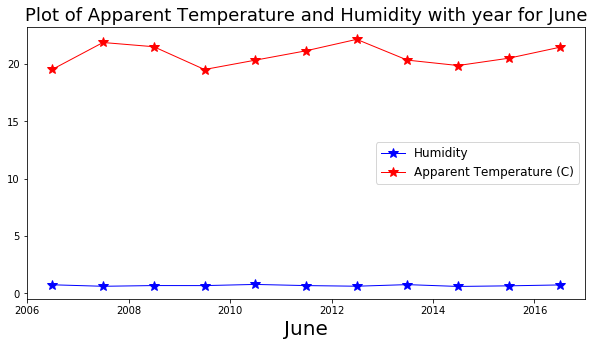

In [16]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year for June",fontsize=18)
plt.plot(jun['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1, markersize=10)
plt.plot(jun['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1, markersize=10)
plt.xlabel('June',fontsize=20)
plt.legend(loc=5,fontsize=12)

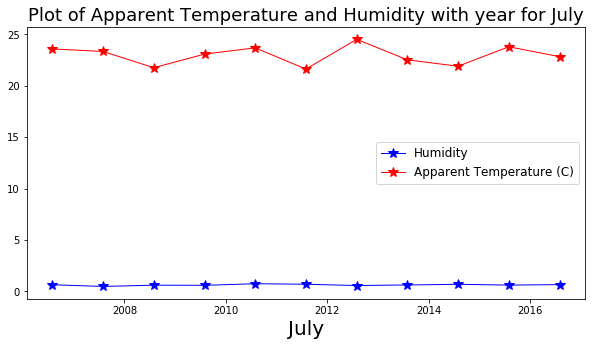

In [17]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year for July",fontsize=18)
plt.plot(jul['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1, markersize=10)
plt.plot(jul['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1, markersize=10)
plt.xlabel('July',fontsize=20)
plt.legend(loc=5,fontsize=12)

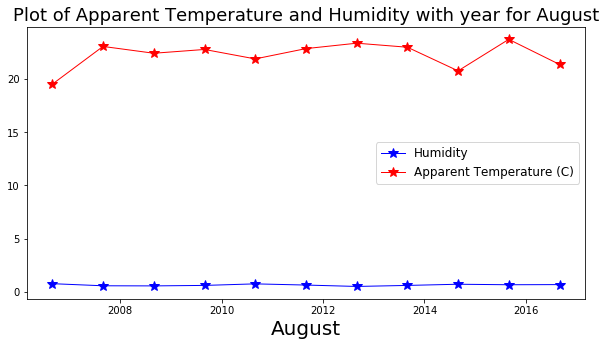

In [18]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year for August",fontsize=18)
plt.plot(aug['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1, markersize=10)
plt.plot(aug['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1, markersize=10)
plt.xlabel('August',fontsize=20)
plt.legend(loc=5,fontsize=12)

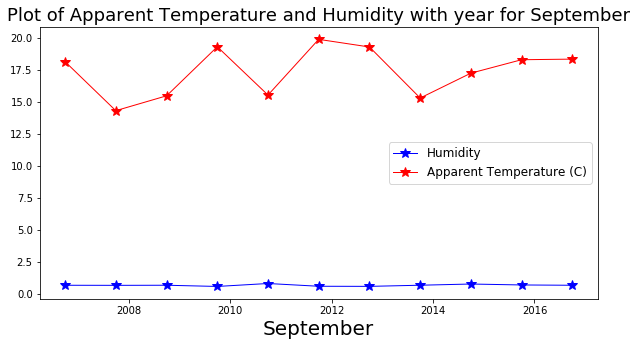

In [19]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year for September",fontsize=18)
plt.plot(sep['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1, markersize=10)
plt.plot(sep['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1, markersize=10)
plt.xlabel('September',fontsize=20)
plt.legend(loc=5,fontsize=12)

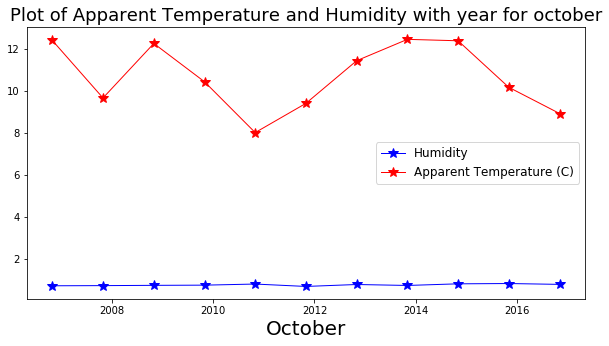

In [20]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year for october",fontsize=18)
plt.plot(octo['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1, markersize=10)
plt.plot(octo['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1, markersize=10)
plt.xlabel('October',fontsize=20)
plt.legend(loc=5,fontsize=12)

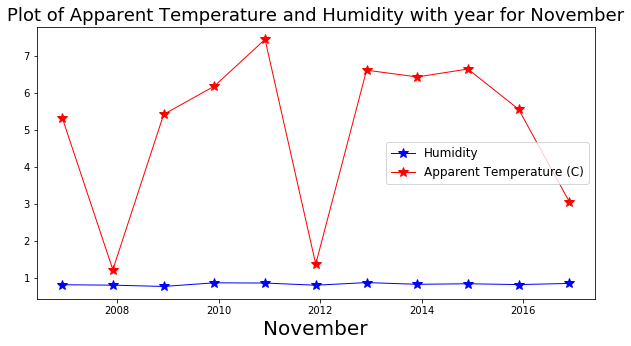

In [21]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year for November",fontsize=18)
plt.plot(nov['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1, markersize=10)
plt.plot(nov['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1, markersize=10)
plt.xlabel('November',fontsize=20)
plt.legend(loc=5,fontsize=12)

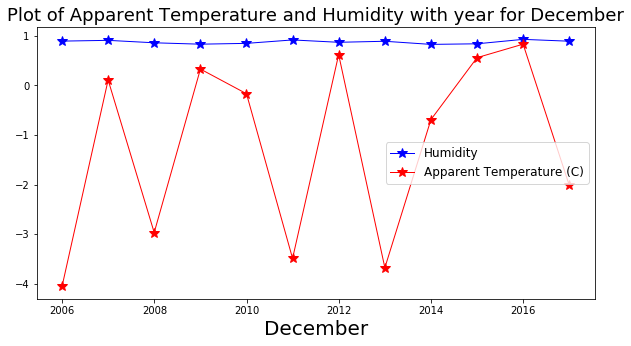

In [22]:
plt.figure(figsize=(10,5))
plt.title("Plot of Apparent Temperature and Humidity with year for December",fontsize=18)
plt.plot(dec['Humidity'],label='Humidity',color='blue',marker='*',linewidth=1, markersize=10)
plt.plot(dec['Apparent Temperature (C)'],label='Apparent Temperature (C)',color='red',marker='*',linewidth=1, markersize=10)
plt.xlabel('December',fontsize=20)
plt.legend(loc=5,fontsize=12)

Observation : No change in average humidity. Increase in average apparent temperature can be seen in the year 2009 then again it dropped in 2010 then there was a slight increase in 2011 then a significant drop is observed in 2015 and again it increased in 2016 .
